In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth',-1)

In [4]:
datapath = './datasets/BX-CSV-Dump/'

In [5]:
books = pd.read_csv(datapath+'BX-Books.csv',error_bad_lines=False,encoding='latin-1',sep=';')
ratings = pd.read_csv(datapath+'BX-Book-Ratings.csv',error_bad_lines=False,encoding='latin-1',sep=';')
users = pd.read_csv(datapath+'BX-Users.csv',error_bad_lines=False,encoding='latin-1',sep=';')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [31]:
len(books)

271360

In [32]:
books.head()

,isbn,booktitle,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


# Peek at ratings

In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
print("Shape is " + str(ratings.shape))
print("\n-------")
print(ratings.isna().sum())

Shape is (1149780, 3)

-------
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


# Peek at users

In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
print("Shape is " + str(users.shape))
print("\n-------")
print(users.isna().sum())

Shape is (278858, 3)

-------
User-ID     0     
Location    0     
Age         110762
dtype: int64


In [11]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [12]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


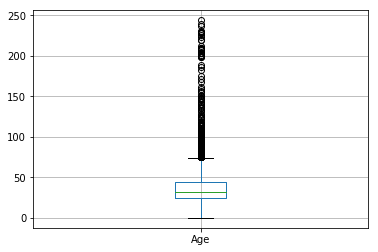

In [13]:
users.boxplot(column=['Age'])

In [14]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


# Since age contains non consistent data, we ignore as our feature

In [15]:
users.drop(columns=['Age'],inplace=True)

In [16]:
users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [17]:
users.rename(columns={'User-ID':'userid','Location':'loc'},inplace=True)
users.head(1)

,userid,loc
0,1,"nyc, new york, usa"


In [18]:
users.userid.unique().shape

(278858,)

In [19]:
books.rename(columns={'ISBN':'isbn','Book-Title':'booktitle',
                      'Book-Author':'bookauthor','Year-Of-Publication':'yearofpublication',
                      'Publisher':'publisher'},inplace = True)
books.head(1)

,isbn,booktitle,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg


In [20]:
ratings.rename(columns={'User-ID':'userid','ISBN':'isbn','Book-Rating':'bookrating'},inplace=True)
ratings.head(1)

,userid,isbn,bookrating
0,276725,034545104X,0


# users(userid)->ratings(userid) (isbn)->books(isbn)

In [21]:
ratings.userid.unique().shape

(105283,)

In [22]:
ur = pd.merge(users,ratings,on=['userid'])

In [23]:
ur.head()

,userid,loc,isbn,bookrating
0,2,"stockton, california, usa",0195153448,0
1,7,"washington, dc, usa",034542252,0
2,8,"timmins, ontario, canada",0002005018,5
3,8,"timmins, ontario, canada",0060973129,0
4,8,"timmins, ontario, canada",0374157065,0


In [24]:
books.head(1)

,isbn,booktitle,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg


In [25]:
data = pd.merge(ur,books,on = ['isbn'])


In [26]:
data.head()

,userid,loc,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,11400,"ottawa, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
3,11676,"n/a, n/a, n/a",0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
4,41385,"sudbury, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg


In [33]:
len(data)

1031136

In [34]:
len(books)

271360

In [27]:
data.dropna(inplace=True)

In [28]:
data.isna().sum()

userid               0
loc                  0
isbn                 0
bookrating           0
booktitle            0
bookauthor           0
yearofpublication    0
publisher            0
dtype: int64

In [29]:
data.head()

,userid,loc,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [30]:
len(data)

1031133

In [31]:
len(data[data['userid']==8])

17

# Getting count of user rating books

In [32]:
userbookcount = pd.DataFrame(data.groupby(['userid'])['bookrating'].count()).reset_index()

In [33]:
userbookcount.head()

,userid,bookrating
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1


In [34]:
data.head()

,userid,loc,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher
0,2,"stockton, california, usa",0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [35]:
data['location'] = data['loc'].apply(lambda x:x.split(',')[-1].lstrip())
data.drop(columns=['loc'],inplace=True)

In [36]:
data = data[data['location']!='n/a']

In [37]:
len(data.location.unique())

287

In [38]:
a = 'adf'

# move ahead

In [39]:
data.head()

,userid,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,location
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,67544,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [40]:
x='1'

In [41]:
x.isdigit()

True

In [42]:
# data['yearofpublication'] = data['yearofpublication'].apply(lambda x:x if type(data.yearofpublication) == int else None)
data.head()

,userid,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,location
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,67544,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [43]:
def givemeunique(x):
    return len(data[x].unique())
for col in data.columns:
    print(col +' --- '+ str(givemeunique(col)))

userid --- 92101
isbn --- 270116
bookrating --- 11
booktitle --- 241041
bookauthor --- 101579
yearofpublication --- 202
publisher --- 16727
location --- 287


In [44]:
# ?data['yearofpublication'] = data.yearofpublication.astype('int')

In [45]:
data.yearofpublication

0          2002
1          2001
2          2001
4          2001
5          2001
6          2001
7          2001
8          2001
9          2001
10         2001
11         2001
12         2001
13         2001
14         2001
15         1991
16         1991
17         1991
18         1999
19         1999
20         1999
21         1999
22         1999
23         1999
24         1999
25         1999
26         1999
27         1999
28         1999
29         1999
30         1991
           ... 
1031106    2002
1031107    2003
1031108    1999
1031109    1996
1031110    1981
1031111    2002
1031112    1985
1031113    1991
1031114    1998
1031115    1988
1031116    2003
1031117    1977
1031118    1988
1031119    2004
1031120    1996
1031121    1997
1031122    1997
1031123    1998
1031124    2002
1031125    2000
1031126    1996
1031127    1911
1031128    1999
1031129    2002
1031130    1987
1031131    2000
1031132    2001
1031133    1985
1031134    1997
1031135    1999
Name: yearofpublication,

In [46]:
sorted(data.bookrating.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [47]:
data.head()

,userid,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,location
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,67544,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


# f(x) = [1,0,0,0,0,0,0,0,0]

In [48]:
data.head()

,userid,isbn,bookrating,booktitle,bookauthor,yearofpublication,publisher,location
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
4,41385,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
5,67544,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [49]:
import os
os.makedirs('./cleaned_data/')

In [50]:
ls

cleaned_data/  gl-env/          Untitled2.ipynb
datasets/      Untitled1.ipynb  Untitled.ipynb


In [51]:
data.to_csv('./cleaned_data/cleanedlevel1.csv',index=None)

In [52]:
ls

cleaned_data/           datasets/  Untitled1.ipynb
Datamanipulation.ipynb  gl-env/    Untitled.ipynb


In [53]:
cd cleaned_data/

/home/bhabuk/Desktop/recommandation-system/cleaned_data
